### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy

### Import Data

In [4]:
# main folder
path = r'C:\Users\steve\Documents\Olist Marketplace Analysis'

# data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'project_data.pkl'))

In [5]:
# pd display settings
pd.set_option('display.max_columns', 30)

### Analysis

#### 1. Data Prep

In [8]:
df.head()

,order_id,seller_id,customer_id,product_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,customer_state,seller_state,num_orders,return_customer,num_orders_w_seller,return_to_seller,num_items,delivery_difference,on_time_flag,num_orders_received,total_revenue,unq_products_sold
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,Construction,79.80,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,1.0,MG,SP,1,0,1,0,1,-13.0,early,200,15989.00,81
1,a9810da82917af2d9aefd1278f1dcfa0,eaf6d55068dea77334e8477d3878d89e,f2c7fc58a9de810828715166c672f10a,a630cc320a8c872f9de830cf121661a3,Auto,17.00,7.39,24.39,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0.29,81.51,1274.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0,early,3,51.00,2
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cc419e0650a3c5ba77189a1882b7556a,25b14b69de0b6e184ae6fe2755e478f9,2028bf1b01cafb2d2b1901fca4083222,Beauty,56.99,8.72,65.71,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,46.54,150.08,1536.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0,early,1893,110821.27,37
3,ba78997921bbcdc1373bb41e913ab953,da8622b14eb17ae2831f4ac5b9dab84a,7a5d8efaaa1081f800628c30d2b0728f,548e5bfe28edceab6b51fa707cc9556f,Home & Garden,89.90,17.88,107.78,2017-12-06 12:04:06,2017-12-21 01:35:51,2018-01-04,0.15,349.53,188.0,1.0,5.0,MG,SP,2,1,2,1,1,-14.0,early,1662,171784.57,222
4,ba78997921bbcdc1373bb41e913ab953,da8622b14eb17ae2831f4ac5b9dab84a,7a5d8efaaa1081f800628c30d2b0728f,548e5bfe28edceab6b51fa707cc9556f,Home & Garden,89.90,17.88,107.78,2017-12-06 12:04:06,2017-12-21 01:35:51,2018-01-04,0.15,349.53,188.0,1.0,5.0,MG,SP,2,1,2,1,1,-14.0,early,1662,171784.57,222


**CORRELATIONS** ---------------------------------------------------------

In [10]:
# create df for correlations
df_corr = df[['price', 'freight_value', 'order_total', 'purchase_to_approved_hrs', 'delivery_time_hrs', 'product_description_length', 'product_photos_qty', 'review_score', 'num_orders', 'return_customer', 'num_orders_w_seller', 'return_to_seller', 'num_items', 'delivery_difference', 'num_orders_received', 'unq_products_sold', 'total_revenue']]

In [11]:
df_corr.corr()

,price,freight_value,order_total,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,num_orders,return_customer,num_orders_w_seller,return_to_seller,num_items,delivery_difference,num_orders_received,unq_products_sold,total_revenue
price,1.000000,0.415934,0.766026,0.017677,0.061525,0.201763,0.052811,-0.004515,-0.039154,-0.085761,-0.038853,-0.081974,-0.075156,-0.003101,-0.103889,-0.071904,0.094183
freight_value,0.415934,1.000000,0.389452,0.033627,0.213155,0.096518,0.022310,-0.037076,-0.005918,-0.033076,-0.004590,-0.032912,-0.035425,-0.040450,-0.070162,-0.082065,0.023213
order_total,0.766026,0.389452,1.000000,0.055628,0.062026,0.162727,0.011350,-0.083442,0.166327,0.175190,0.184045,0.168495,0.332381,-0.020106,-0.073570,-0.066993,0.081807
purchase_to_approved_hrs,0.017677,0.033627,0.055628,1.000000,0.084758,0.007106,0.000369,-0.024281,0.041765,0.013432,0.049427,0.012664,0.054486,0.043155,0.011672,-0.003971,0.011459
delivery_time_hrs,0.061525,0.213155,0.062026,0.084758,1.000000,0.005701,-0.026723,-0.302536,-0.013328,-0.023337,-0.004460,-0.008486,-0.020694,0.598066,0.038391,0.029803,0.065665
product_description_length,0.201763,0.096518,0.162727,0.007106,0.005701,1.000000,0.117895,0.010354,-0.012573,-0.041256,-0.004826,-0.033477,-0.018554,0.007101,-0.151986,-0.185803,-0.071051
product_photos_qty,0.052811,0.022310,0.011350,0.000369,-0.026723,0.117895,1.000000,0.022266,-0.036595,-0.073765,-0.050971,-0.071286,-0.068371,0.004096,0.015113,-0.013874,-0.049973
review_score,-0.004515,-0.037076,-0.083442,-0.024281,-0.302536,0.010354,0.022266,1.000000,-0.081485,-0.152610,-0.077401,-0.120039,-0.163450,-0.228248,-0.027582,-0.026574,-0.018347
num_orders,-0.039154,-0.005918,0.166327,0.041765,-0.013328,-0.012573,-0.036595,-0.081485,1.000000,0.453892,0.947213,0.454148,0.511213,-0.021553,0.007399,-0.003103,0.001718
return_customer,-0.085761,-0.033076,0.175190,0.013432,-0.023337,-0.041256,-0.073765,-0.152610,0.453892,1.000000,0.488383,0.953894,0.574503,-0.050334,0.028147,0.005035,0.000725


#### 2.Visualizations

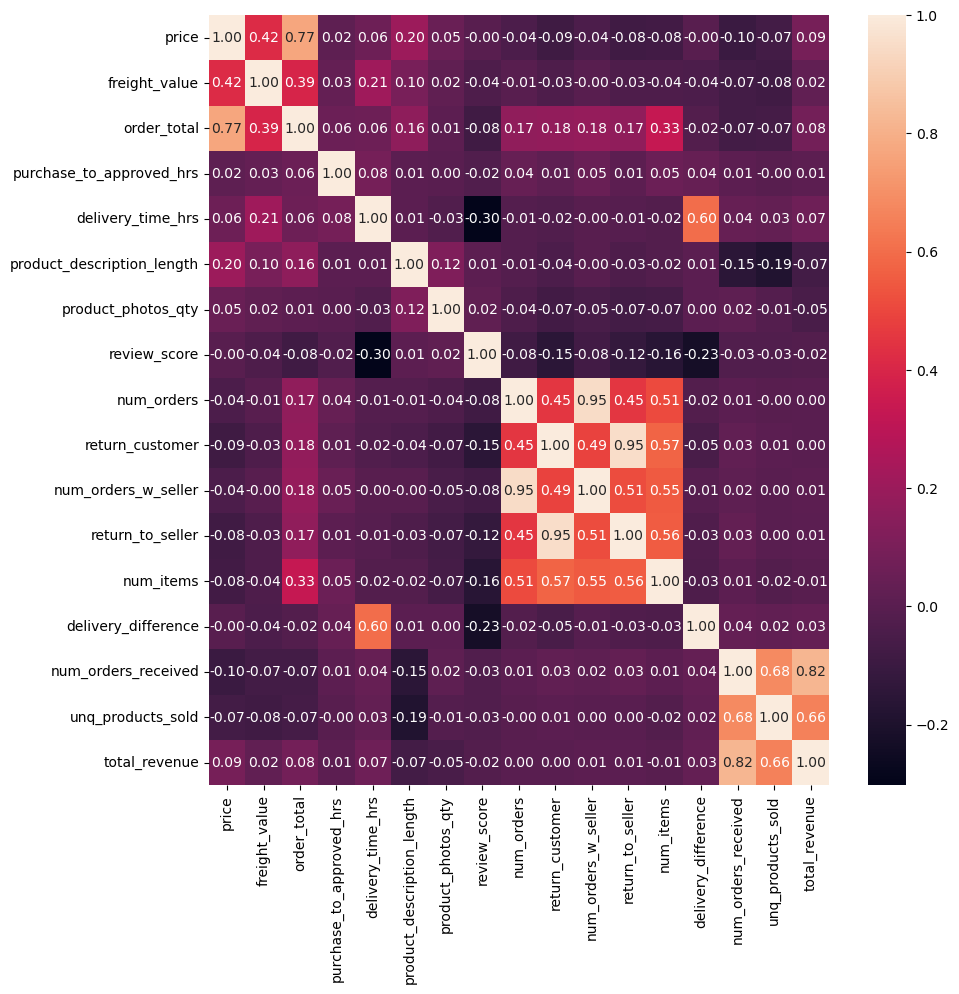

In [13]:
# subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# correlation heatmap in seaborn
corr = sns.heatmap(df_corr.corr(), annot=True, ax=ax, fmt=".2f",)

**Insights:**

**Strong** Relationships:  
- There is a strong, positive relationtionship (0.95) between **num_orders** and **return_to_seller** - most return customers purchase from a seller they previously bought from.
- There is a strong, positive relationship (0.82) between **total_revenue** and the **num_orders_received**.
- There is a strong, positive relationship between **unq_products_sold** and **num_orders_received** (0.68) as well as **total_revenue** (0.66) - more unique products does add to orders and revenue.
- There is a strong, positive relationship (0.57) between **return_customer** and **num_items** - return customers buy more items in an order than a one-time customer.
  
**Moderate** Relationships:
- There is a moderate, positive relationship (0.33) between **order_total** and **num_items**. As expected, the more items in an order, the more the order will cost. However, since not a strong relationship, could indicate a wide price range of products - some orders many low priced items, some 1 high priced item.
- This is a moderate, negative relationship (-0.30) between **delivery_time_hrs** and **review_score** - high delivery times are a factor in a lower review score. They coeffiecient for review_score and **delivery_difference** is -0.23 - most higher delivery times were due to a later than expected delivery date, and thus negatively effected review scores.
  
**Weak** Relationships:  
- There is a weak, positive relationship (0.21) between **freight_value** and **delivery_time** - more expensive shipping can lead to (or is a result of) longer delivery durations and pressumably delivery distance.

---

**Return Customers**:
- **Buy more items** *(see 'Strong Relationships)*
- **Return to the same sellers** *(see 'Strong Relationships)*
- **Do not return for new products**: There is a a 0 correlation between unq_products_sold and  return_to_seller.
 - **No trend in review scores**: The relationships between review_score and return_customer is very minimal at -0.15, and with num_orders, -0.08, meaning reviews are being left by both non-returning and returning customers with no leaning of a higher/lower score depending on customer's frequnency. *With the variables available, review score seem to be mainly swayed by delivery times.*  
 - **No trend in spending amount**: Return customers num_orders has no relationship with price and only a weak relationship with order total indicating no consistent spending habits by repeat customers.

**Seller Performance**:
- **Related to number of orders**
- **Related to number of products**
- **Not related to product prices**: Number of orders received has no noticeable relationships - with only a very weak (-.10) relatioship to price and (-0.15) with product description (a variable correlated to price). This indicates that the number of orders received is only very slightly negtively impacted by higher priced products.
- **Not related to review scores**: A higher number of orders does not correlate to a better or worse review score.

**SCATTERPLOTS** ----------------------------------------------------------

Create scatterplots for:   
1. num_orders & return_to_seller
2. return_customer & num_items
3. return_customer & price
4. return_customer & review_score
5. delivery_time_hrs & review_score 
7. price & num_orders_received
8. total_revenue & num_orders_received
9. unq_products_sold & return_to_seller

**num_orders** & **return_to_seller**

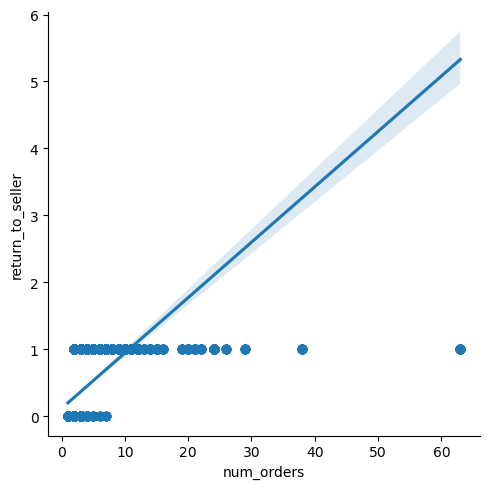

In [18]:
# create scattterplot
numOrders_returnToSeller_scat = sns.lmplot(x = 'num_orders', y = 'return_to_seller', data = df_corr)

**Insight:** Any customer that has placed 10 orders or more has at some point bought from the same seller. Customers that have not returned to a seller have only made less than 10 orders at Olist.

**return_customer** & **num_items**

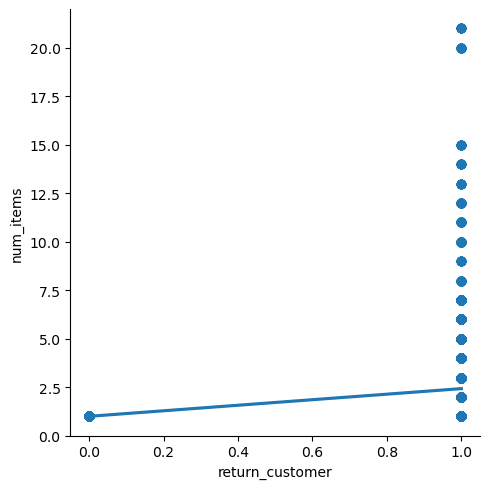

In [21]:
returnCust_numItems_scat = sns.lmplot(x = 'return_customer', y = 'num_items', data = df_corr)

**Insight:** Return customers have a wie range of number of items per order - placing anywhere from 1 to over 20 items per order. Non-returning customers to Olist only bought 1 item.

**return_customer** & **price**

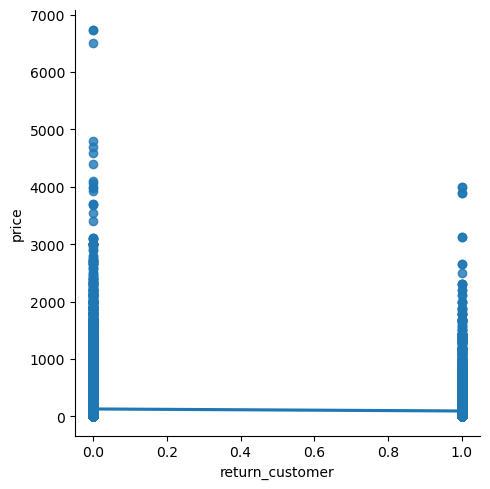

In [24]:
returnCust_price_scat = sns.lmplot(x = 'return_customer', y = 'price', data = df_corr)

**Insight:** While non-returning customers only bought 1 item, the price range of their product is wider than that a returning customer's products.  
- Non-returning customers:  < 1 to ~ 6,500.  
- A returning customer:  <1 to ~ 4,500.

**return_customer** & **review_score**

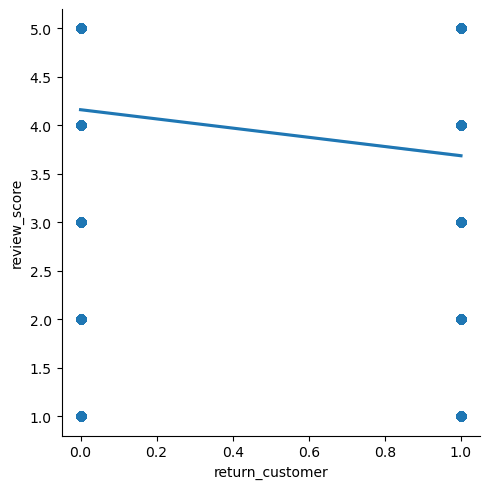

In [27]:
returnCust_review_scat = sns.lmplot(x = 'return_customer', y = 'review_score', data = df_corr)

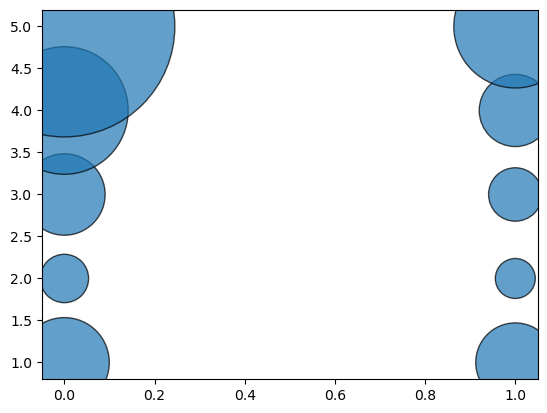

In [28]:
# show density of review score by return customer
# create count
df_counts = df_corr.groupby(['review_score', 'return_customer']).size().reset_index(name='count')
# plot where size of each point is determined by the count
plt.scatter(df_counts['return_customer'], df_counts['review_score'], s=df_counts['count']*0.5, alpha=0.7, edgecolor='black')

In [29]:
df_corr['return_customer'].value_counts(dropna=False)

return_customer
0    85747
1    32560
Name: count, dtype: int64

In [30]:
df_counts

,review_score,return_customer,count
0,1.0,0,8359
1,1.0,1,6495
2,2.0,0,2429
3,2.0,1,1656
4,3.0,0,6878
5,3.0,1,2962
6,4.0,0,16886
7,4.0,1,5400
8,5.0,0,50581
9,5.0,1,15683


In [31]:
# find percents
# calculate the return_cust count for 0 and 1
cust_counts = df_counts.groupby('return_customer')['count'].transform('sum')

# create new column to show the percent
df_counts['percent_of_total'] = round(((df_counts['count'] / cust_counts) * 100), 2)

df_counts

,review_score,return_customer,count,percent_of_total
0,1.0,0,8359,9.82
1,1.0,1,6495,20.17
2,2.0,0,2429,2.85
3,2.0,1,1656,5.14
4,3.0,0,6878,8.08
5,3.0,1,2962,9.20
6,4.0,0,16886,19.83
7,4.0,1,5400,16.77
8,5.0,0,50581,59.41
9,5.0,1,15683,48.71


**Insight:** Return customers give tougher review scores.
- 20% return customers leaving reviews left a score of 1; only about 10% of non-return customers left a 1.
- Non-return customers are about 10% more likely to leave a 5 than a return customer. 

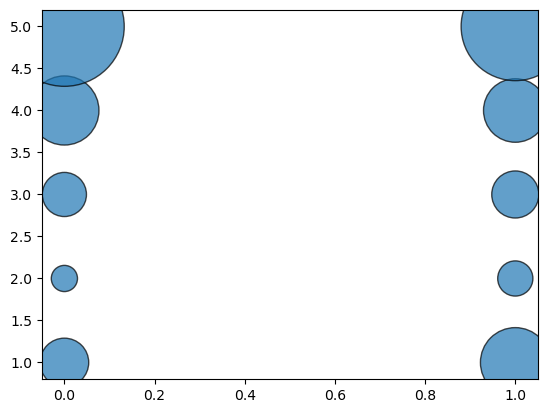

In [33]:
# create scatterplot using percents rather than counts
plt.scatter(df_counts['return_customer'], df_counts['review_score'], s=df_counts['percent_of_total']*125, alpha=0.7, edgecolor='black')

**review_score** & **delivery_time_hrs**

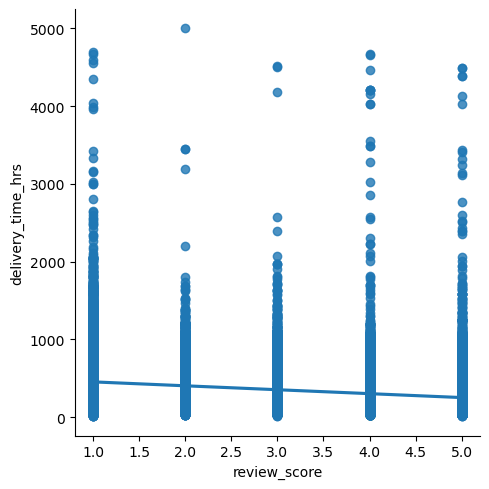

In [35]:
deliveryTime_review_scat = sns.lmplot(x = 'review_score', y = 'delivery_time_hrs', data = df_corr)

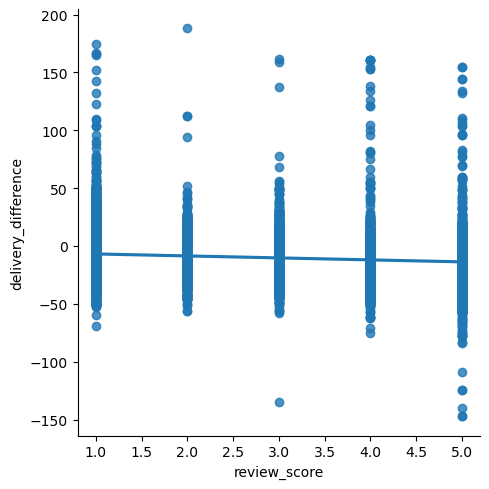

In [36]:
deliveryDiff_review_scat = sns.lmplot(x = 'review_score', y = 'delivery_difference', data = df_corr)

**Negative** -> **early**  
**Positive** -> **late**

**Insight:** 
- 5's have the most and earliest 'early' deliveries.
- Similar spreads of data points for late deliveries for 1, 4, 5 - all reaching about 175 days late
- 1 has the highest dense area, reaching about 75/100 compared to 5's height of 50. 

*No drastic differences in delivery for review scores; suggesting delivery times are not a determing factor.*  
*Other factors could be item does not match customer expectation, is damaged, is poor quality, etc. These variables are not availble in the data provided.*

**num_orders_received** & **price**

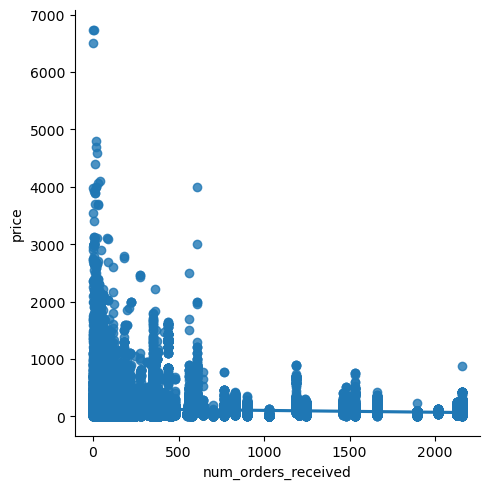

In [39]:
price_ordersReceived_scat = sns.lmplot(x = 'num_orders_received', y = 'price', data = df_corr)

**Insight:** 
- The price of items bought decreases as the number of order received increases. *Luxury items are typically bought less times than a lower cost item.*
- Any seller with > 750 orders has only sold products priced about $1,000 or less.

*Note: Number of orders does not determine profit ranking necessarily. Sellers that had less than 500 orders, but with products priced $1,000+ could be profiting more than seller with higher orders but lower priced items.*

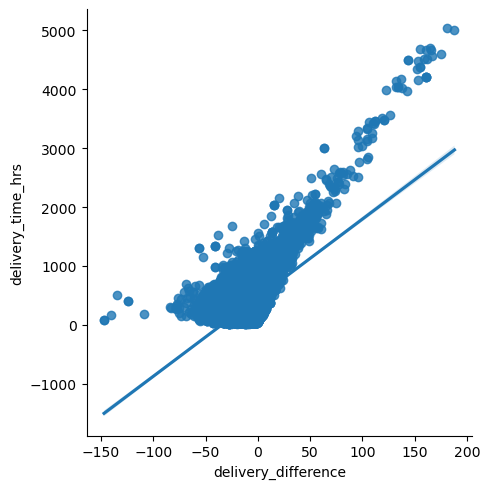

In [41]:
delivery_diff_scat = sns.lmplot(x = 'delivery_difference', y = 'delivery_time_hrs', data = df_corr)

Negative delivery difference = early  
Positive delivery difference = late

**Insight:** There is a convergence of points at or around a delivery_difference of 0 which marks the 'expected delivery date'. However, the density of points spans from about -100 to 100; delivery difference is measured in days. This is a wide range for delivery days, over 3 months!

**total_revenue** & **num_orders_received**

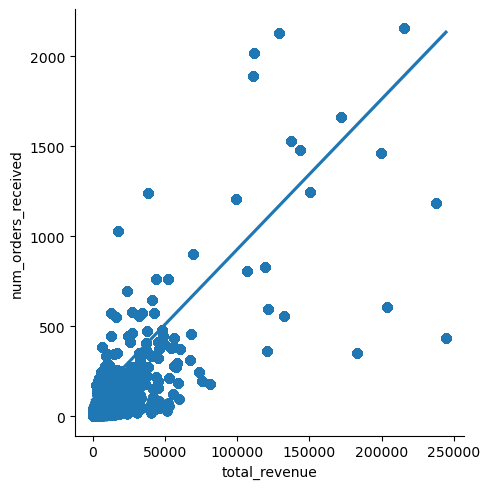

In [44]:
revenue_numOrders_scat = sns.lmplot(x = 'total_revenue', y = 'num_orders_received', data = df_corr)

**Insight:** The trend line has a strong positive slope, but the data is spread out rather than tight around the trend line. While the number of orders does yield higher revenue, the price of products creates a wide spread with some sellers making more money with 500 orders than those with 2,000 orders.

**unq_products_sold** & **return_to_seller**

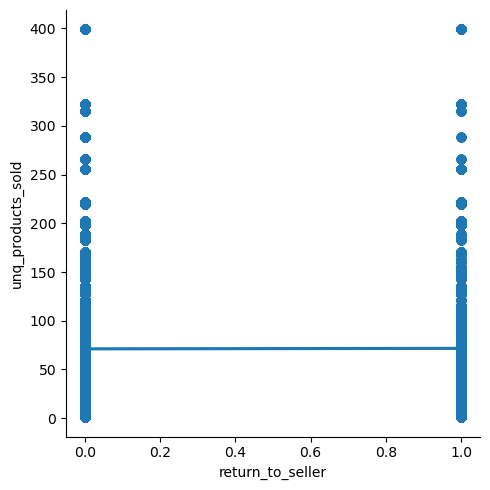

In [47]:
unqProd_return_scat = sns.lmplot(x = 'return_to_seller', y = 'unq_products_sold', data = df_corr)

**Insight:** There is no difference between return or non-returning - whether or not a customer shops once or continues shopping with a seller is not related to the number of products they offer.

**PAIR PLOT** ------------------------------------------------------------

In [50]:
# subdivide df to better see plots
df_pair_prods = df_corr[['price', 'freight_value', 'order_total', 'purchase_to_approved_hrs', 'delivery_time_hrs', 'num_orders', 'total_revenue']]
df_pair_ppl = df_corr[['return_customer', 'num_orders_w_seller', 'return_to_seller', 'num_items', 'num_orders_received', 'total_revenue', 'unq_products_sold']]
df_pair_review = df_corr[['review_score', 'delivery_time_hrs', 'delivery_difference', 'num_orders', 'return_customer', 'return_to_seller']]

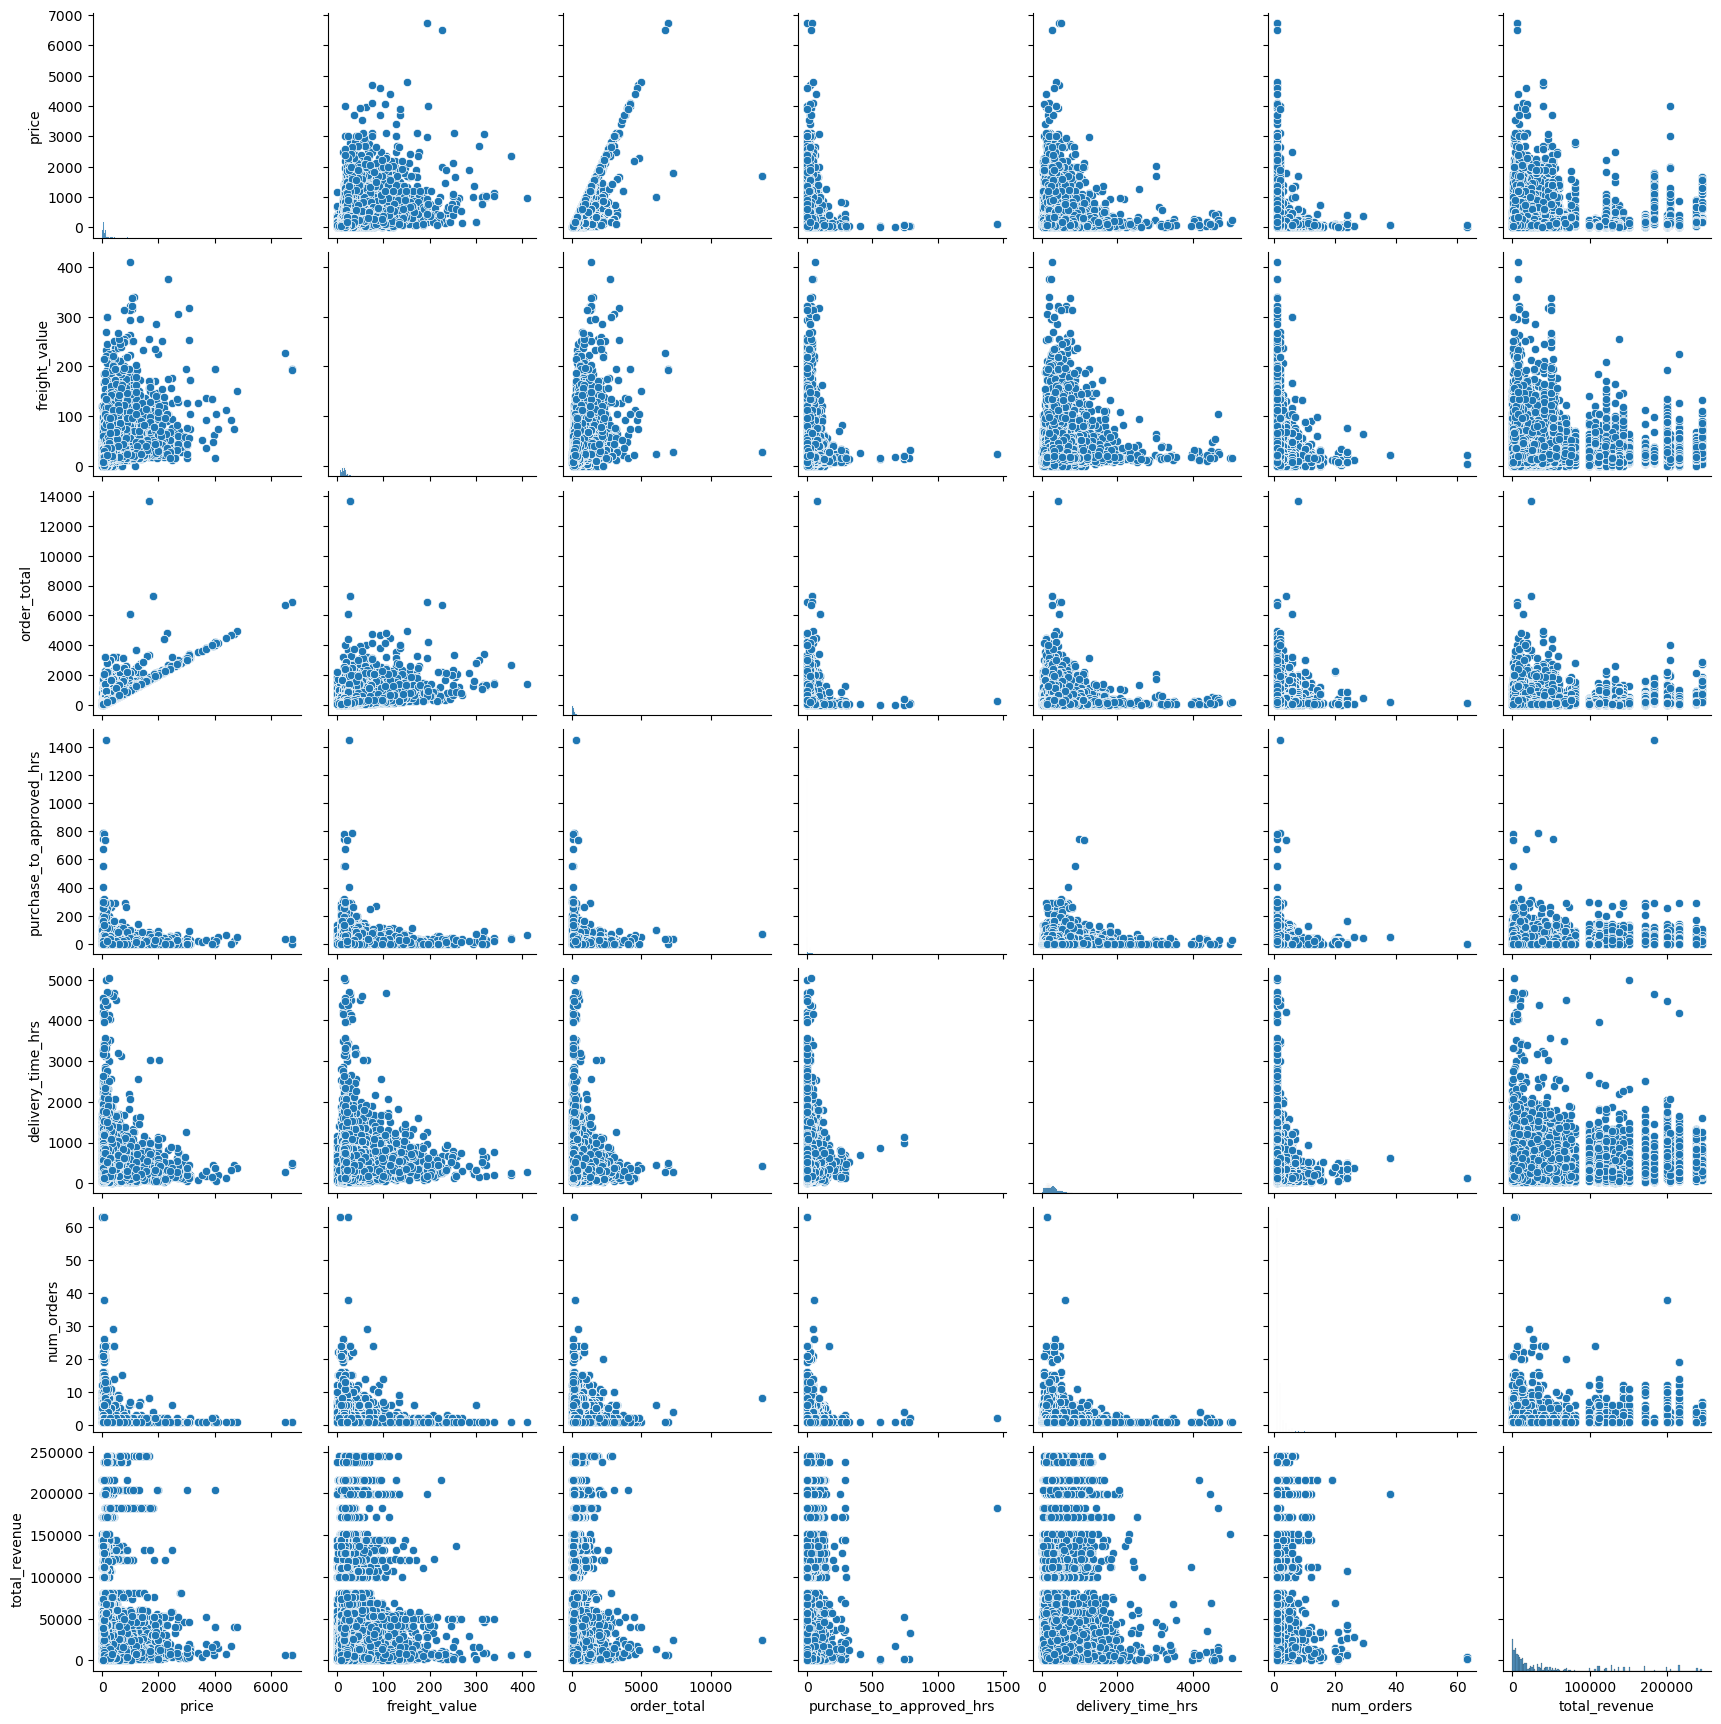

In [51]:
prods_pair = sns.pairplot(df_pair_prods)

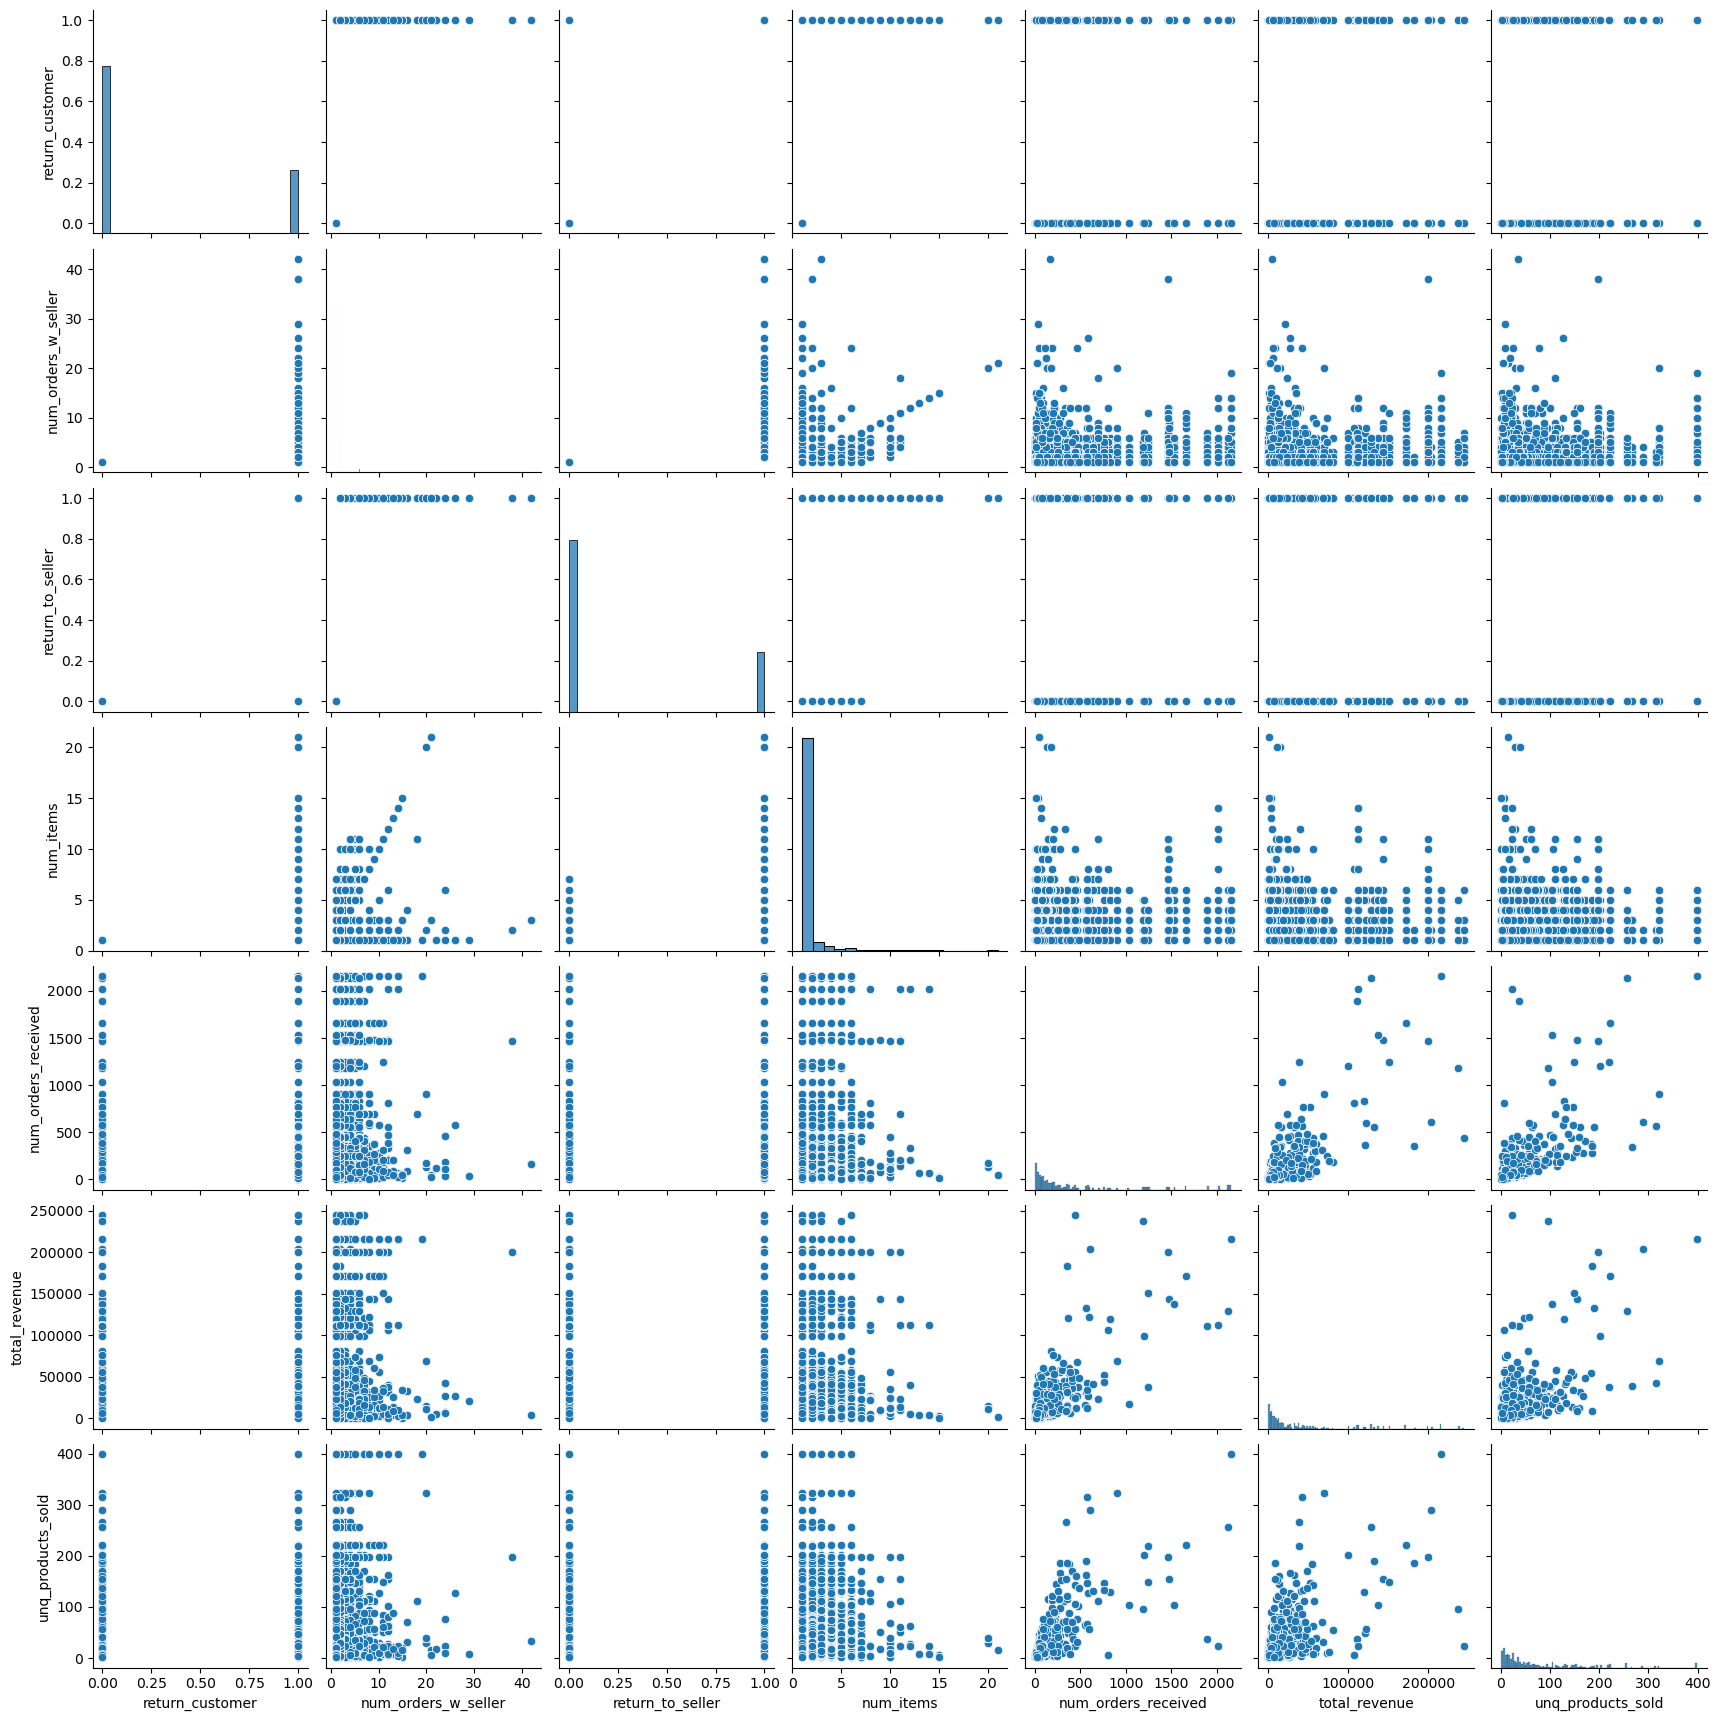

In [52]:
ppl_pair = sns.pairplot(df_pair_ppl)

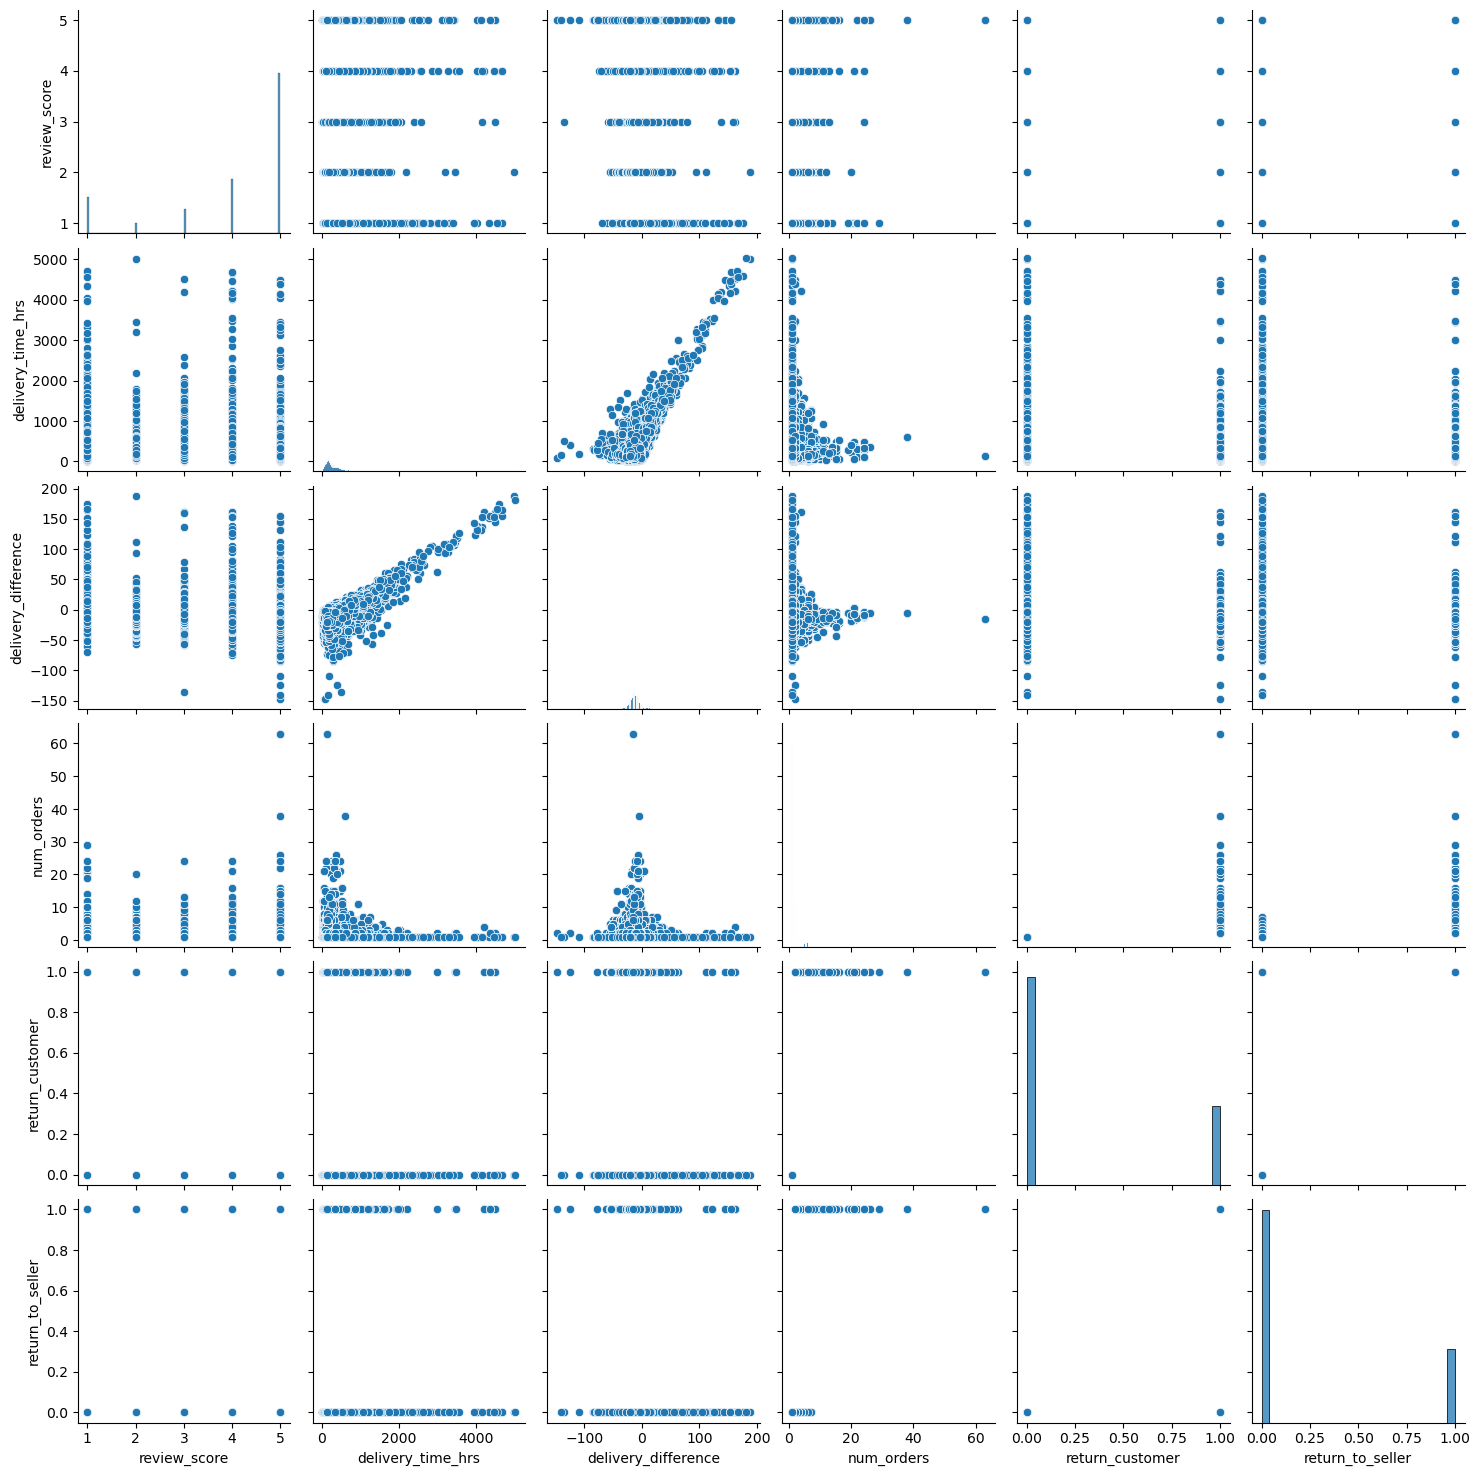

In [53]:
reviews_pair = sns.pairplot(df_pair_review)

In [54]:
# show AVG & MAX delivery times per return status
df_corr.groupby('return_customer')['delivery_time_hrs'].mean(), df_corr.groupby('return_customer')['delivery_time_hrs'].max()

(return_customer
 0    302.952698
 1    291.114226
 Name: delivery_time_hrs, dtype: float64,
 return_customer
 0    5031.09
 1    4492.88
 Name: delivery_time_hrs, dtype: float64)

**Insight:**
- Higher number of orders have lower delivery times and typically arrive on or close to their expected delivery date. 
- Return customers have lower delivery times - with a average that's about 7 hours higher and a max that's about 500 hours higher.

**Delivery time is a factor in a customer ordering again with Olist.**

**CATEGORICAL PLOT** --------------------------------------------------------

**Total Revenue** - **Prices**

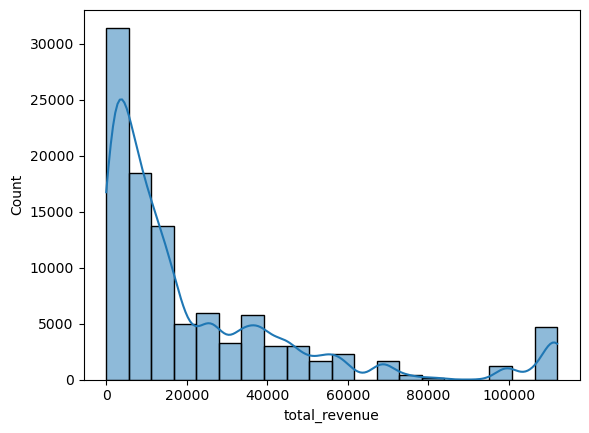

In [58]:
# -- prep data by removing outliers
# calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['total_revenue'].quantile(0.25)
Q3 = df['total_revenue'].quantile(0.75)

# calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter out the outliers
filtered_revenue_total = df[df['total_revenue'] >= lower_bound]
filtered_revenue_total = filtered_revenue_total[filtered_revenue_total['total_revenue'] <= upper_bound]

# -- create histogram using filtered data
rev_total_hist = sns.histplot(filtered_revenue_total['total_revenue'], bins=20, kde=True)

In [59]:
df_corr['total_revenue'].min(), df_corr['total_revenue'].mean(), df_corr['total_revenue'].max()

(3.5, 42826.03990068214, 244627.55)

In [60]:
df.loc[df['total_revenue'] < 10000, 'revenue_flag'] = 'Low revenue'

In [61]:
df.loc[(df['total_revenue'] >= 10000) & (df['total_revenue'] < 50000), 'revenue_flag'] = 'Medium revenue'

In [62]:
df.loc[df['total_revenue'] > 50000, 'revenue_flag'] = 'High revenue'

In [63]:
df['revenue_flag'].value_counts(dropna=False)

revenue_flag
Low revenue       47142
Medium revenue    42373
High revenue      28792
Name: count, dtype: int64

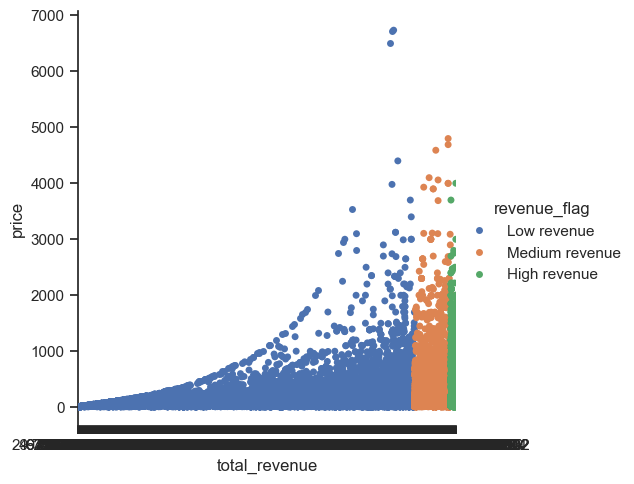

In [64]:
sns.set(style="ticks")
revenue_price_g = sns.catplot(x="total_revenue", y="price", hue="revenue_flag", data=df)

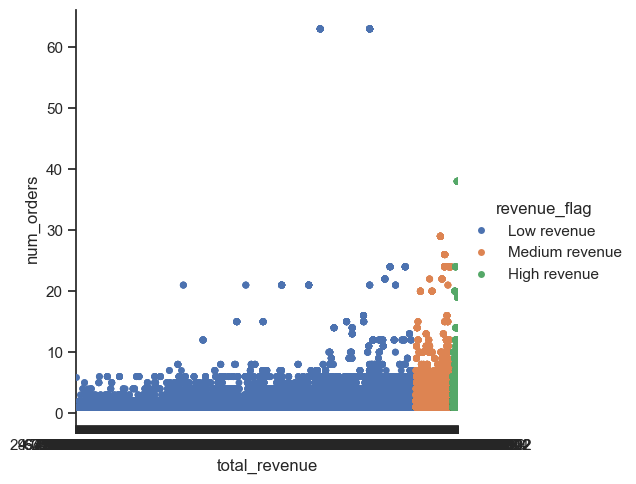

In [65]:
sns.set(style="ticks")
revenue_orders_g = sns.catplot(x="total_revenue", y="num_orders", hue="revenue_flag", data=df)

**Insight:** There is a stronger relationship between product proce and total revenue than number of orders and revenue.

**Number of Orders** - **Returning Customers**

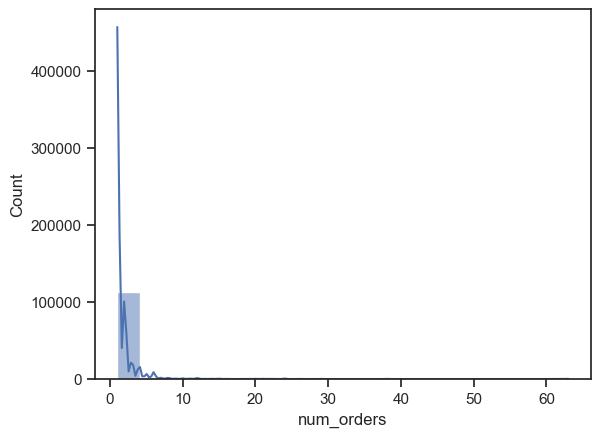

In [68]:
# -- histogram of number of orders
num_orders_hist = sns.histplot(df['num_orders'], bins=20, kde=True)

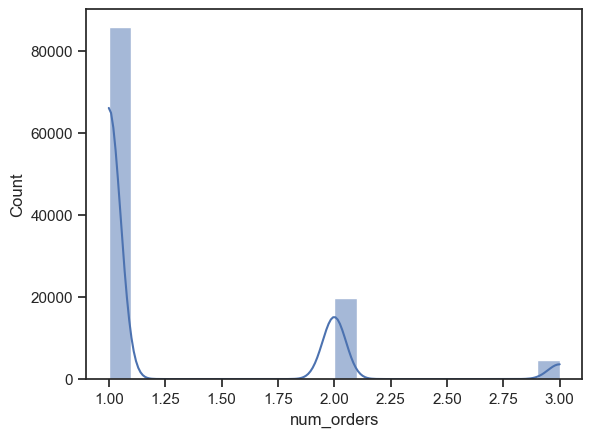

In [69]:
# -- num or orders histogram with outliers removed
# calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['num_orders'].quantile(0.25)
Q3 = df['num_orders'].quantile(0.75)

# calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter out the outliers
filtered_numOrders_total = df[df['num_orders'] >= lower_bound]
filtered_numOrders_total = filtered_numOrders_total[filtered_numOrders_total['num_orders'] <= upper_bound]

# -- create histogram using filtered data
num_orders_hist = sns.histplot(filtered_numOrders_total['num_orders'], bins=20, kde=True)

In [70]:
df.loc[df['num_orders'] == 1, 'frequency_flag'] = 'New customer'

In [71]:
df.loc[(df['num_orders'] > 1) & (df['num_orders'] <= 5), 'frequency_flag'] = 'Low frequency customer'

In [72]:
df.loc[df['num_orders'] > 5, 'frequency_flag'] = 'High frequency customer'

In [73]:
df['frequency_flag'].value_counts(dropna=False)

frequency_flag
New customer               85747
Low frequency customer     28875
High frequency customer     3685
Name: count, dtype: int64

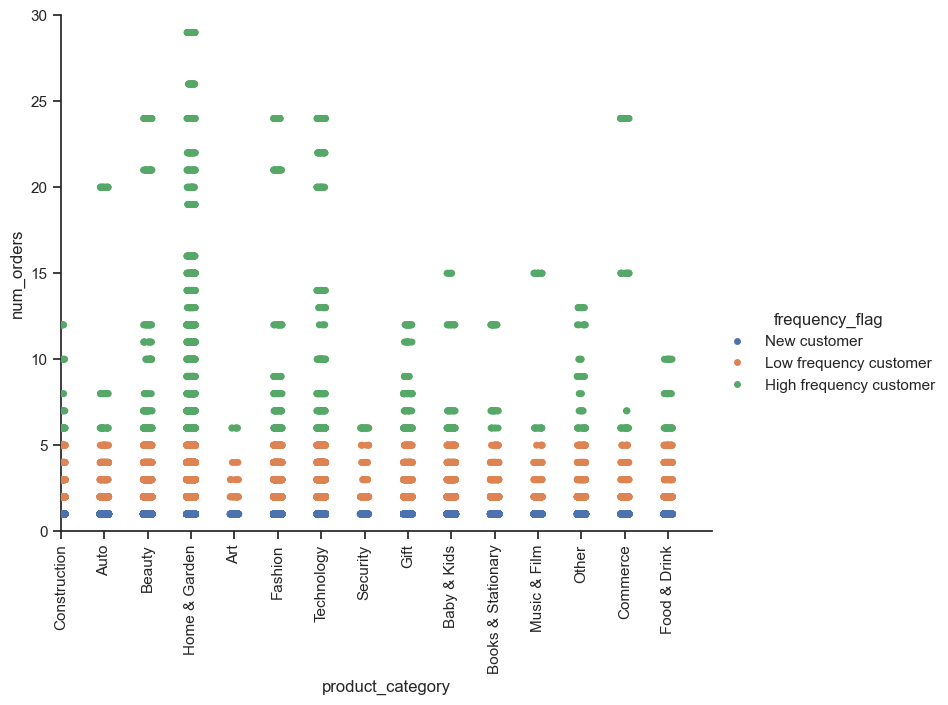

In [74]:
sns.set(style="ticks")
freq_price_g = sns.catplot(x="product_category", y="num_orders", hue="frequency_flag", data=df,aspect = 1.25, height = 6)
freq_price_g.set(xlim = (0, 15), ylim = (0, 30))
freq_price_g.set_xticklabels(freq_price_g.ax.get_xticklabels(), rotation=90)

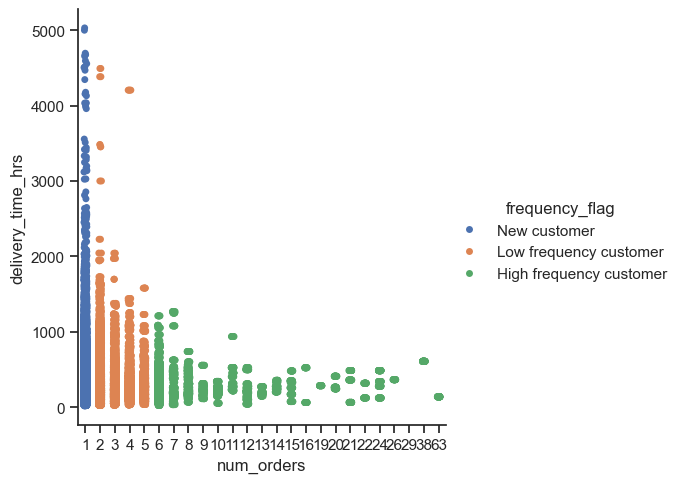

In [75]:
sns.set(style="ticks")
freq_price_g = sns.catplot(x="num_orders", y="delivery_time_hrs", hue="frequency_flag", data=df)

**Distribution of customers by state**

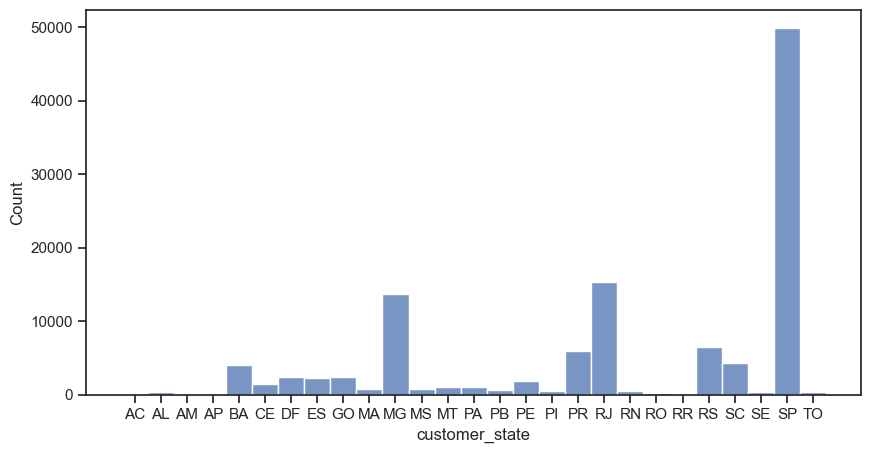

In [77]:
plt.figure(figsize=(10, 5))

# sort alphabetically so easier to compare with seller stats
df['customer_state'] = pd.Categorical(df['customer_state'], categories=sorted(df['customer_state'].unique()), ordered=True)

customer_state_hist = sns.histplot(df['customer_state'])

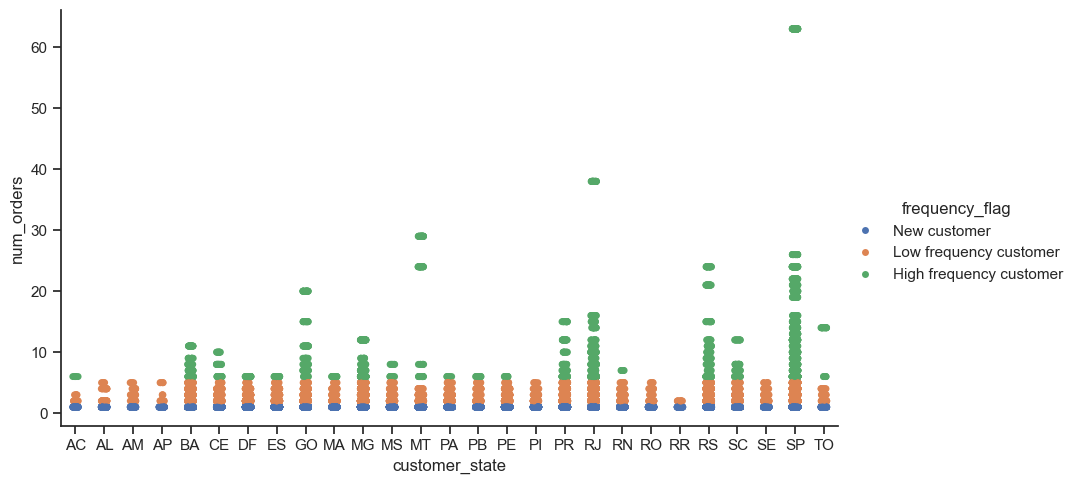

In [78]:
custState_freq_g = sns.catplot(x="customer_state", y="num_orders", hue="frequency_flag", data=df, aspect = 1.75, height = 5)

**Distribution of sellers by state**

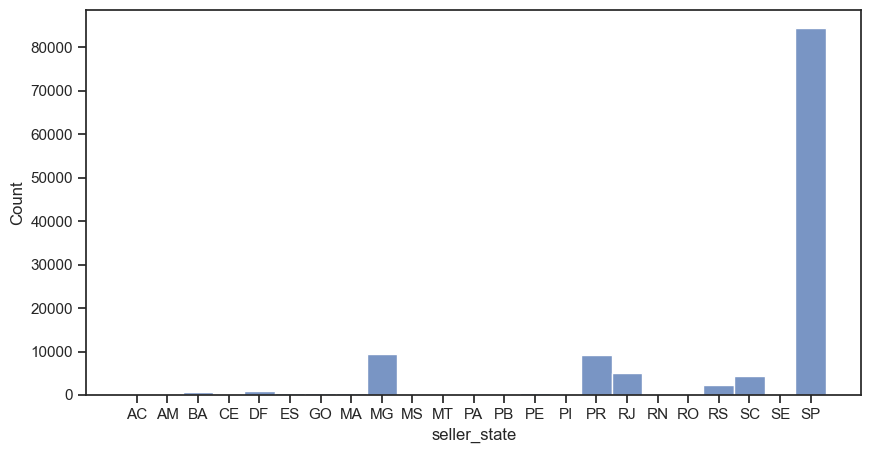

In [80]:
plt.figure(figsize=(10, 5))

# sort alphabetically
df['seller_state'] = pd.Categorical(df['seller_state'], categories=sorted(df['seller_state'].unique()), ordered=True)

seller_state_hist = sns.histplot(df['seller_state'])

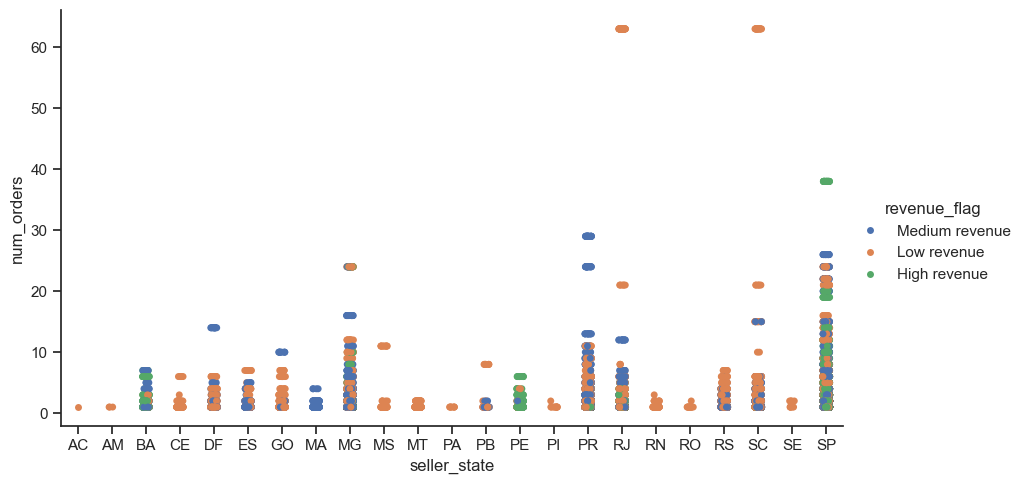

In [81]:
sellerState_rev_g = sns.catplot(x="seller_state", y="num_orders", hue="revenue_flag", data=df, aspect = 1.75, height = 5)

**Insight:** 
- All states with higher number of sellers *(states where bar visible on histogram)* do you have higher number of orders and amount of higher revenue sellers.
- There are some states with low number of sellers that are performing well: BA, DF, ES, GO, and PE.

### Export 

In [84]:
corr.figure.savefig(os.path.join(path, '04 Analysis', 'corr_heatmap.png'))

In [85]:
revenue_price_g.figure.savefig(os.path.join(path, '04 Analysis', 'price_rev_cat.png'))

In [86]:
revenue_orders_g.figure.savefig(os.path.join(path, '04 Analysis', 'numOrders_rev_cat.png'))

In [87]:
customer_state_hist.figure.savefig(os.path.join(path, '04 Analysis', 'customer_state_hist.png'))

In [88]:
seller_state_hist.figure.savefig(os.path.join(path, '04 Analysis', 'seller_state_hist.png'))

**Data**

In [90]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'project_data_w_flags.pkl'))

In [91]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'project_data_w_flags.csv'))